- ## Escolha do modelo
- ## Treinamento do modelo
- ## Teste do modelo
- ## Armazenamento do modelo

In [1]:
# maximiza nro de linhas e colunas para exibição
# inibe mensagens de warning
import pandas as pd
pd.set_option('display.max_rows', None) # permite a máxima visualização das linhas em um display
pd.set_option('display.max_columns', None) # permite a máxima visualização das colunas em um display
import warnings
warnings.simplefilter('ignore') # inibe a exibição de avisos de warning
warnings.filterwarnings('ignore') # inibe a exibição de avisos de warning

In [2]:
# modelos de aprendizado por reforço
from keras.models import Sequential # O modelo Sequential é apropriado para uma pilha simples de camadas, onde cada camada tem exatamente um tensor de entrada e um tensor de saída.

from keras.models import load_model # função load_model do Keras é utilizada para carregar modelos que foram salvos anteriormente usando model.save(). Isso permite que você recupere modelos treinados do armazenamento para uso posterior.
from keras.layers import Dense # A camada Dense em Keras é uma camada de rede neural densamente conectada que realiza a operação: saída = ativação(dot(entrada, peso) + viés).
from keras.optimizers import Adam # Adam é um método que se adapta à taxa de aprendizado, sendo amplamente utilizado para otimização em modelos de aprendizado de máquina. 

In [3]:
# preparação e visualização de dados
import numpy as np # computação de matrizes
from matplotlib import pyplot as plt # plotagem gráfica

import datetime # O módulo datetime fornece classes para manipular datas e horários,
import random # é utilizado para gerar números pseudoaleatórios e realizar diversas operações de aleatorização, como escolher elementos aleatórios de uma lista.
from collections import deque # O deque, ou fila de duas extremidades, é uma estrutura de dados que permite a inserção e remoção eficiente de elementos em ambas as extremidades.

In [4]:
# carregando arquivo tratado em dataframe
df_milk = pd.read_csv('df_treated/df_milk_temperature_treated.csv')

In [5]:
# conferindo a dimensão do dataframe, linhas e colunas
df_milk.shape

(2056, 17)

In [6]:
# ordenando pelo index o dataframe carregado
df_milk = df_milk.sort_index()

In [7]:
# reconhecendo as primeiras linhas do dataframe
df_milk.head(5)

,local,data,hora,lat,long,umidade,t_ex,t1,t2,t3,t4,t5,t6,t7,t8,data_hora,temp
0,1,01/08/2023,00:09:30,-18.918173,-48.230431,47.418488,25.892607,24.409178,24.427492,24.427492,24.427549,24.427597,24.427624,24.423851,24.415396,2023-01-08 00:09:30,4.00000
1,1,01/08/2023,00:19:30,-18.918213,-48.230457,47.540405,25.869171,24.345068,24.364992,24.364992,24.365047,24.365095,24.365124,24.359230,24.351067,2023-01-08 00:19:30,4.00000
2,1,01/08/2023,00:29:30,-18.918280,-48.230495,47.464645,25.812103,24.269100,24.302492,24.297718,24.280001,24.270069,24.265360,24.271393,24.273392,2023-01-08 00:29:30,4.00000
3,1,01/08/2023,00:39:30,-18.918213,-48.230446,47.419193,25.660603,24.214598,24.221876,24.217857,24.204088,24.197790,24.205063,24.211004,24.215107,2023-01-08 00:39:30,4.00000
4,1,01/08/2023,00:49:30,-18.918257,-48.230518,47.535355,25.644939,24.157568,24.172058,24.175756,24.176691,24.176956,24.177114,24.167929,24.163687,2023-01-08 00:49:30,3.17097


In [8]:
# verificando as características de cada variável
df_milk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2056 entries, 0 to 2055
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   local      2056 non-null   int64  
 1   data       2056 non-null   object 
 2   hora       2056 non-null   object 
 3   lat        2056 non-null   float64
 4   long       2056 non-null   float64
 5   umidade    2056 non-null   float64
 6   t_ex       2056 non-null   float64
 7   t1         2056 non-null   float64
 8   t2         2056 non-null   float64
 9   t3         2056 non-null   float64
 10  t4         2056 non-null   float64
 11  t5         2056 non-null   float64
 12  t6         2056 non-null   float64
 13  t7         2056 non-null   float64
 14  t8         2056 non-null   float64
 15  data_hora  2056 non-null   object 
 16  temp       2056 non-null   float64
dtypes: float64(13), int64(1), object(3)
memory usage: 273.2+ KB


In [9]:
# criando uma lista dos valores das colunas que serão utilizadas para o treinamento e teste
X=list(df_milk['temp'])

In [10]:
# separando algumas linhas do final para fazer uma prévia rápida e conferir o código
#X= X[230:]


In [11]:
# separando as variáveis de treino(80%) e de teste(20%)
X=[float(x) for x in X] 
validation_size = 0.2 
train_size = int(len(X) * (1-validation_size)) 
X_train, X_test = X[0:train_size], X[train_size:len(X)]

In [12]:
# verificando quantas ocorrências de treino e de teste foram geradas
print(len(X_train))
print(len(X_test))

1644
412


In [13]:
# verificando as primeiras ocorrências da lista de valores de treino
X_train[:10]

[4.0,
 4.0,
 4.0,
 4.0,
 3.170969875000001,
 3.111838249999998,
 3.06631625,
 7.982315374999999,
 6.893088000000002,
 7.914007625]

In [14]:
# verificando as primeiras ocorrências da lista de valores de teste
X_test[:10]

[4.0,
 4.0,
 3.109975249999998,
 6.899199625000001,
 5.688396999999995,
 4.0,
 7.947267374999999,
 4.0,
 4.0,
 3.194948]

In [15]:
# declara a classe Agent
# instancia o modelo sequential
# treina e ajusta o modelo

class Agent: 
    def __init__(self, state_size, is_eval=False, model_name=''): 
        self.state_size = state_size # dias anteriores normalizados 
        self.action_size = 3 # manter, vai subir, vai baixar 
        self.memory = deque(maxlen=1000) 
        self.inventory = [] 
        self.model_name = model_name 
        self.is_eval = is_eval 
        self.gamma = 0.95
        self.epsilon = 1.0 
        self.epsilon_min = 0.01 
        self.epsilon_decay = 0.995 
        self.model = load_model('models/' + model_name) if is_eval else self._model()

    def _model(self): 
        model = Sequential() 
        model.add(Dense(units=64, input_dim=self.state_size, activation='relu')) 
        model.add(Dense(units=32, activation='relu')) 
        model.add(Dense(units=8, activation='relu')) 
        model.add(Dense(self.action_size, activation='linear'))
        model.compile(loss='mse', optimizer=Adam(learning_rate=0.001)) 
        return model     

    def act(self, state): 
        '''
        print('@@@@@ self_model', self.model)
        print('@@@@@ self.is_eval', self.is_eval)
        print('@@@@@ random.random()', random.random())
        print('@@@@@ self.epsilon()', self.epsilon)
        '''

        if not self.is_eval and random.random() <= self.epsilon: 
            return random.randrange(self.action_size)

        options = self.model.predict(state) 
        return np.argmax(options[0])

    def expReplay(self, batch_size):
        mini_batch = [] 
        l = len(self.memory) 

        #1: preparar a replay memory 
        for i in range(l - batch_size + 1, l): 
            mini_batch.append(self.memory[i]) 

        #2: Fazer loop em todo o lote de replay. 
        for state, action, reward, next_state, done in mini_batch: 
            target = reward # recompensa ou Q no tempo t 

            #3: atualizar o alvo para tabela Q. equação de tabela
            if not done: 
                target = reward + self.gamma * np.amax(self.model.predict(next_state)[0]) #set_trace() 
            
            #4: Valor Q do estado atual a partir da tabela 
            target_f = self.model.predict(state) 
            
            #5: Atualizar a tabela Q de saída para a ação dada na tabela 
            target_f[0][action] = target 
            
            #6. Treinar e ajustar o modelo 
            self.model.fit(state, target_f, epochs=1, verbose=0)

            #7. Implementar algoritmo epsilon greedy 
            if self.epsilon > self.epsilon_min: 
                self.epsilon *= self.epsilon_decay

- As recompensas são computadas.
- Os pesos do modelo Q-learning baseado em aprendizado profundo são atualizados iterativamente ao longo de diversos episódios.
- O lucro e a perda de cada título são somados para determinar se um lucro geral ocorreu. 
- O objetivo é maximizar o lucro total.

- A função MODEL é um modelo de aprendizado profundo que conecta os estados com as ações.
- O modelo espera linhas de dados com números de variáveis iguais ao tamanho do estado, que chega como uma entrada.
- A primeira, a segunda e a terceira camadas ocultas têm 64, 32 e 8 nós, respectivamente, e todas essas camadas usam a função de ativação ReLU. 
- A camada de saída tem o número de nós igual ao tamanho da ação (três), e o nó usa uma função de ativação linear.

- A função ACT retorna uma ação dado um estado. Ela usa a função model e retorna uma ação de compra, venda ou hold.

- A função EXPREPLAY é a função-chave, na qual a rede neural é treinada com base na experiência observada. Essa função implementa o mecanismo replay de experiência. O replay de experiência armazena um histórico de estado, ação, recompensa e próximas transições de estado que são experienciadas pelo agente.
- A abordagem epsilon greedy implementada nessa função impede o sobreajuste.

In [16]:
# Calcula um valor entre 0 e 1 resultado da função sigmoide, usando um valor x passado.
def sigmoid(x):
    return 1/(1 + np.exp(-x)) 

- A função sigmoide é uma das funções de ativação mais conhecidas e se destaca por produzir resultados entre 0 e 1, concentrando valores próximos a essas extremidades.

In [17]:
# gera o estado considerando os dados da ação, o tempo t (dia da previsão) e a janela n (número de dias para voltar no tempo).
def getState(data, t, n): 
    d = t - n + 1 
    block = data[d:t + 1] if d >= 0 else -d * [data[0]] + data[0:t + 1]

    res = [] 
    for i in range(n - 1): 
        res.append(sigmoid(block[i + 1] - block[i])) 
        
    return np.array([res])

In [18]:
# retorna a plotagem do preço de mercado juntamente com indicadores para as títulos de compra e de venda.
def plot_behavior(data_input, states_vai_subir, states_vai_baixar, Variacao, titulo, nomearq):
    fig = plt.figure(figsize = (15, 5)) 
    plt.plot(data_input, color='gray', lw=2.) 
    plt.plot(data_input, '^', markersize=10, color='red', label='vai subir', markevery=states_vai_subir) 
    plt.plot(data_input, 'v', markersize=10, color='blue', label='vai baixar', markevery = states_vai_baixar) 
    plt.title(titulo + ' - ' + nomearq + ' - Total diferença: %f'%(Variacao)) 
    plt.legend() 

    plt.savefig('grafic_image/' + nomearq + '.png', format='png')

    plt.show()

In [19]:
# recebe um valor float e retorna formatado com 2 decimais
def formatTemperature(vr):
    return ("%.2f" % vr)

In [20]:
# cria dataframe de valores de fechamento original, se vende, se compra ou se mantem
df_modelo = {
    'vr_fechamento': [],
    'vr_vai_subir': [],
    'vr_vai_baixar': [],
}

df_milk_action = pd.DataFrame(df_modelo)

In [21]:
# estancia e inicializa variáveis para o treino
window_size = 1
agent = Agent(window_size)
data = X_train # ....................
l = len(data) - 1 
batch_size = 10 
states_vai_baixar = [] 
states_vai_subir = [] 
episode_count = 3 

In [ ]:
# invoca o treinamento de alguns modelos cuja quantidade é do episode_count considerando iniciar em 0
# armazena os modelos treinados na pasta models
# para cada action retornado do agent exibe o resultado como uma ação de buy(comprar), sell(vender) ou hold(manter)
now = datetime.datetime.now()
print("INÍCIO DO TREINO - Data e hora atuais: ", now.strftime("%Y-%m-%d %H:%M:%S"))

for e in range(episode_count + 1): 
    print('Episode ' + str(e) + '/' + str(episode_count)) 
    
    # 1-obter estado 
    state = getState(data, 0, window_size + 1) 
    total_variacao = 0.0 
    agent.inventory = []

    for t in range(l): 
        # 2-aplicar a melhor ação 
        action = agent.act(state) 

        #print('***** state', state)
        #print('***** action', action)

        # sit 
        next_state = getState(data, t + 1, window_size + 1) 
        reward = 0 
        before_temp = 0 # ....................
        if action == 1: # vai subir 
            agent.inventory.append(data[t]) 
            states_vai_subir.append(t) 
            print('1 - vai subir: ' + formatTemperature(data[t]))
            dfx = pd.DataFrame({"vr_fechamento":[data[t]],"vr_vai_subir":[data[t]],"vr_vai_baixar":['Nan']})
            df_milk_action = pd.concat([df_milk_action, dfx], ignore_index=True)

        elif action == 2 and len(agent.inventory) > 0: # vai baixar
            before_temp = agent.inventory.pop(0) 
        
            #3: Obter diferença 
            reward = max(data[t] - before_temp, 0) 
            total_variacao += data[t] - before_temp 
            states_vai_baixar.append(t) 
            print('2 - vai baixar: ' + formatTemperature(data[t]) + ' | Variacao : ' + formatTemperature(data[t] - before_temp))
            dfx = pd.DataFrame({"vr_fechamento":[data[t]],"vr_vai_subir":['Nan'],"vr_vai_baixar":[data[t]]})
            df_milk_action = pd.concat([df_milk_action, dfx], ignore_index=True)

            print('Total da variacao: ' + formatTemperature(total_variacao)) 

        else:
            #print('3 - vai manter: ' + formatTemperature(data[t]))  
            dfx = pd.DataFrame({"vr_fechamento":[data[t]],"vr_vai_subir":['Nan'],"vr_vai_baixar":['Nan']})
            df_milk_action = pd.concat([df_milk_action, dfx], ignore_index=True)              

        done = True if t == l - 1 else False 
        
        # 4: Obter próximo estado a ser usado na equação de Bellman 
        next_state = getState(data, t + 1, window_size + 1) 
        
        # 5: Acrescentar à memória 
        agent.memory.append((state, action, reward, next_state, done)) 
        state = next_state 

        '''
        print('e: ' + str(e) + ' | l: ' + str(l) + ' | t: ' + str(t) + ' | action: ' + str(action) + \
              ' | before_temp: ' + formatTemperature(before_temp)) 
        print('lent(agent.memory): ' + str(len(agent.memory)) + ' | batch_size: ' + str(batch_size))
        '''

        # 6: Executar função replay buffer 
        if len(agent.memory) > batch_size: 
            agent.expReplay(batch_size) 

        if e % 10 == 0: 
            agent.model.save('models/model_ep' + str(e) + '.keras')

        if done: 
            print('--------------------------------')
            print('Total da variacao: ' + formatTemperature(total_variacao)) 
            print('--------------------------------') 

    agent.model.save('models/model_ep' + str(e) + '.keras')

    # plotando o resultado do treino
    plot_behavior(data, states_vai_subir, states_vai_baixar, total_variacao, 'Resultado do Treino', 'model_ep' + str(e) + '_treino')
    
now = datetime.datetime.now()
print("FIM DO TREINO - Data e hora atuais: ", now.strftime("%Y-%m-%d %H:%M:%S"))

In [ ]:
# Faz o teste do modelo passado utilizando os valores da lista de teste X_test
# o agente já está definido no conjunto de teste precedente. 
# para cada action retornado do agent exibe o resultado como uma ação de buy(comprar), sell(vender) ou
# hold(manter)
def testa_modelos(data, window_size, model_name, nome_grafico):
    agent = Agent(window_size, False, model_name) 
    data = X_test # ....................
    l = len(data) - 1 
    states_vai_baixar = [] 
    states_vai_subir = [] 
    
    # 1-obter estado 
    state = getState(data, 0, window_size + 1) 
    total_variacao = 0.0 
    agent.inventory = []

    for t in range(l): 
        # 2-aplicar a melhor ação 
        action = agent.act(state) 

        #print('***** state', state)
        #print('***** action', action)

        # sit 
        next_state = getState(data, t + 1, window_size + 1) 
        reward = 0 
        before_temp = 0 # ....................
        if action == 1: # compra 
            agent.inventory.append(data[t]) 
            states_vai_subir.append(t) 
            print('1 - vai subir: ' + formatTemperature(data[t]))

        elif action == 2 and len(agent.inventory) > 0: # venda
            before_temp = agent.inventory.pop(0) 
        
            #3: Obter Recompensa 
            reward = max(data[t] - before_temp, 0) 
            total_variacao += data[t] - before_temp 
            states_vai_baixar.append(t) 
            print('2 - vai baixar: ' + formatTemperature(data[t]) + ' | Variacao : ' + formatTemperature(data[t] - before_temp))

            #print('Total da variacao: ' + formatTemperature(total_variacao))          

        done = True if t == l - 1 else False 
        
        # 4: Obter próximo estado a ser usado na equação de Bellman 
        next_state = getState(data, t + 1, window_size + 1) 
        
        # 5: Acrescentar à memória 
        agent.memory.append((state, action, reward, next_state, done)) 
        state = next_state 

        '''
        print('e: ' + str(e) + ' | l: ' + str(l) + ' | t: ' + str(t) + ' | action: ' + str(action) + \
              ' | before_temp: ' + formatTemperature(before_temp)) 
        print('lent(agent.memory): ' + str(len(agent.memory)) + ' | batch_size: ' + str(batch_size))
        '''

        if done: 
            print('--------------------------------')
            print('Total da variacao: ' + formatTemperature(total_variacao)) 
            print('--------------------------------') 

    # plotando o resultado do teste
    plot_behavior(data, states_vai_subir, states_vai_baixar, total_variacao, 'Resultado do Teste', nome_grafico)

In [ ]:
# invoca a função testa_modelos para o teste de predição em todos os modelos treinados
now = datetime.datetime.now()
print("INÍCIO DO TESTE - Data e hora atuais: ", now.strftime("%Y-%m-%d %H:%M:%S"))

for i in range(episode_count+1):
    nome_grafico = 'model_ep' + str(i) + '_test'
    model_name = 'model_ep' + str(i) + '.keras'
    testa_modelos(X_test, window_size, model_name, nome_grafico)

now = datetime.datetime.now()
print("FIM DO TESTE - Data e hora atuais: ", now.strftime("%Y-%m-%d %H:%M:%S"))

<function matplotlib.pyplot.show(close=None, block=None)>

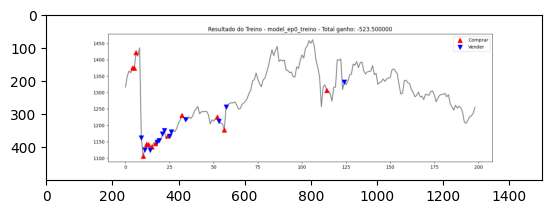

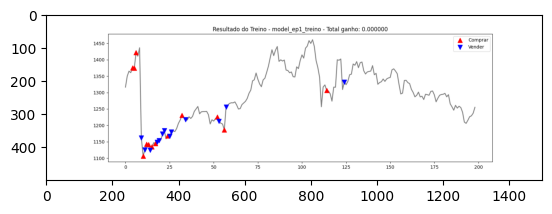

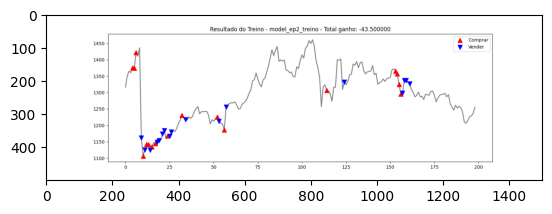

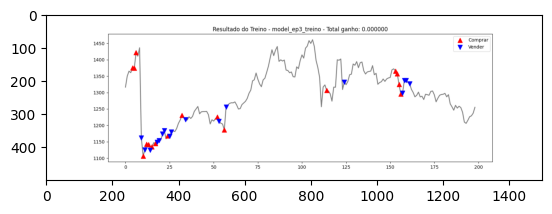

In [ ]:
# exibe os gráficos de treino para cada modelo
import matplotlib.image as mpimg

for i in range(episode_count+1): 
    nome_grafico = 'model_ep' + str(i) + '_treino'
    plt.figure()
    plt.imshow(mpimg.imread('grafic_image/' + nome_grafico + '.png'))

plt.show

Aqui observamos que para cada modelo foi gerado um gráfico resultado do treino para cada modelo que mostra a evolução das cotações juntamente com a marcação do momento de compra e venda de títulos de soja. Vemos que o model_ep2 e o model_ep3 tem uma melhor distribuição da predição de venda e compra.

<function matplotlib.pyplot.show(close=None, block=None)>

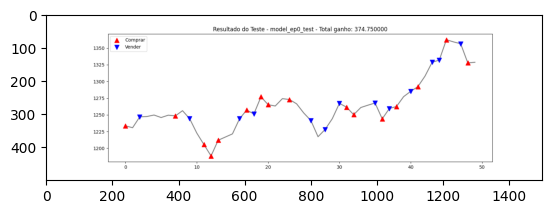

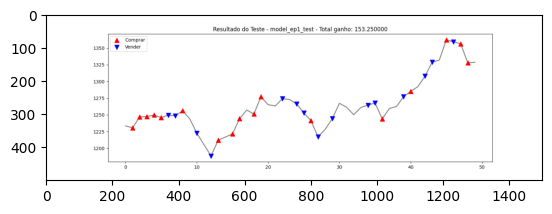

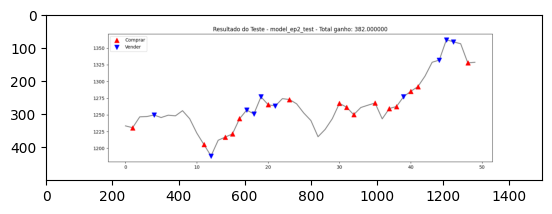

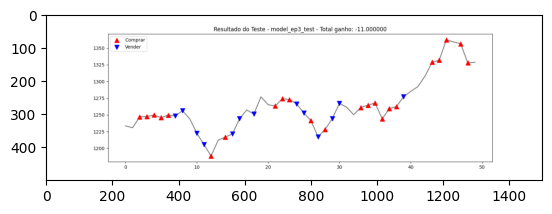

In [ ]:
# exibe os gráficos de teste para cada modelo
for i in range(episode_count+1):
    nome_grafico = 'model_ep' + str(i) + '_test'
    plt.figure()
    plt.imshow(mpimg.imread('grafic_image/' + nome_grafico + '.png'))

plt.show

Aqui observamos que para cada modelo foi gerado um gráfico resultado do teste para cada modelo que mostra a evolução das cotações juntamente com a marcação do momento de compra e venda de títulos de soja, isso utilizando somente os dados de teste, 20% do total do ano. Vemos que o model_ep1 e o model_ep3 tem uma melhor distribuição da predição de venda e compra.